# Алгоритм оценки параметров линейной регрессии

*Данный проект является приложением к курсовой работе по теме **"Алгоритмы оценки параметров линейной регрессии"**.*

Требуется реализовать алгоритм по оценке параметров модели линейной регрессии для улучшения качества предсказаний и статистического обоснования результатов.

<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Входные-данные" data-toc-modified-id="Входные-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Входные данные</a></span><ul class="toc-item"><li><span><a href="#Чтение-исходных-данных" data-toc-modified-id="Чтение-исходных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение исходных данных</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Обработка-значений-выбросов" data-toc-modified-id="Обработка-значений-выбросов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка значений-выбросов</a></span></li><li><span><a href="#Формирование-тренировочной-и-тестовой-выборок" data-toc-modified-id="Формирование-тренировочной-и-тестовой-выборок-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Формирование тренировочной и тестовой выборок</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель линейной регрессии</a></span><ul class="toc-item"><li><span><a href="#Итого" data-toc-modified-id="Итого-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Применение-модели" data-toc-modified-id="Применение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Применение модели</a></span><ul class="toc-item"><li><span><a href="#Итого" data-toc-modified-id="Итого-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Проверка-значимости" data-toc-modified-id="Проверка-значимости-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка значимости</a></span><ul class="toc-item"><li><span><a href="#Итого" data-toc-modified-id="Итого-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Итого" data-toc-modified-id="Итого-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Итого</a></span></li></ul></li></ul></div>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns

from IPython.display import display
from typing import *

%matplotlib inline

## Входные данные

Входные данные имеют формат `.csv`. То есть файл с данными должен выглядеть следующим образом:

*Строка 1:* X, y

*Строка 2:* 10, 31

*Строка 3:* 15, 45

...

*Строка n:* $X_{n}$, $y_{n}$

### Чтение исходных данных

При чтении исходных данных требуется указать абсолютный(полный) путь к данным. 

Есть обработка ошибок.

In [2]:
file_path = input('Введите абсолютный путь к файлу с данными:\n')

try:
    data = pd.read_csv(file_path, sep='\t')
    if data.shape[1] > 2 or data.shape[0] < 10:
        raise Exception(
            f'Данные успешно прочитаны, но имеют неверный размер -> {data.shape}. '
            f'Данный алгоритм предназначен для прогнозирования одной зависимой '
            f'переменной на основе значений одной независимой переменной. '
            f'Для корректной работы алгоритма требуется не менее 10-ти объектов в выборке'
        )
    else:
        print('Данные успешно прочитаны!')
        display(data.head())
except FileNotFoundError:
    print('Указан неверный путь!')

Введите абсолютный путь к файлу с данными:
example_data.csv
Данные успешно прочитаны!


,X,y
0,167.672710,168.269155
1,190.727737,186.620830
2,180.744423,171.850559
3,196.051701,188.431577
4,188.866047,173.270182


Данные были взяты из открытых источников и являются синтетическими, то есть не содержат значимой информации

---

Посмотрим на то, как выглядит линейная связь величин на графике

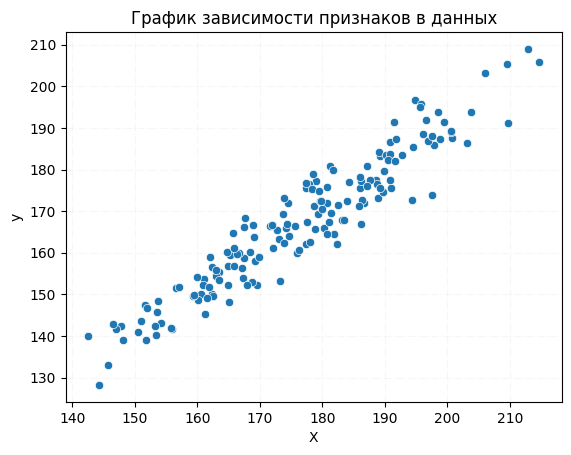

In [3]:
sns.scatterplot(
    x=data['X'], y=data['y'])

plt.title(
    'График зависимости признаков в данных')
plt.grid(
    alpha=.1, linestyle='-.')

plt.show()

Распределение величин

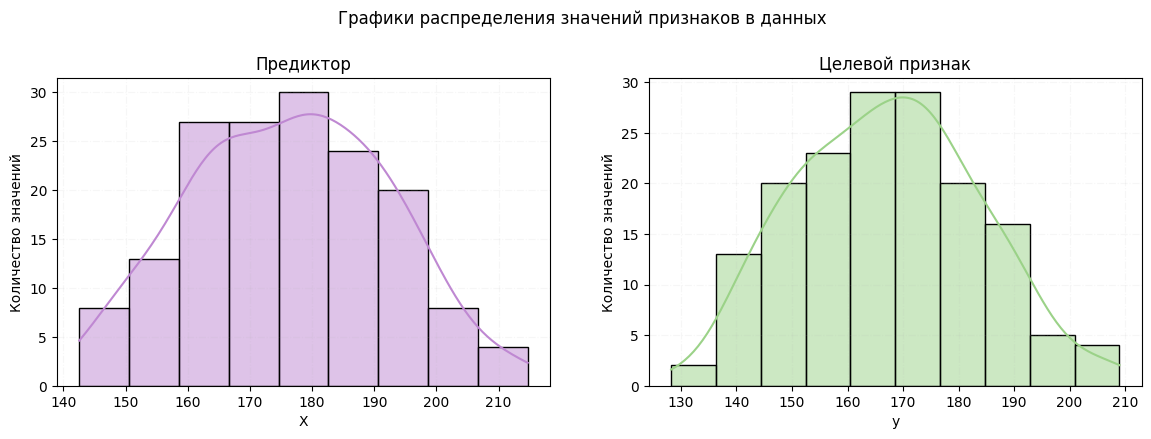

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

fig.suptitle(
    'Графики распределения значений признаков в данных', y=1.05)


sns.histplot(
    data=data['X'], kde=True, alpha=.5, ax=ax[0], color='#bf88d2')

ax[0].set_title('Предиктор')
ax[0].grid(
    alpha=.1, linestyle='-.')
ax[0].set_ylabel('Количество значений')


sns.histplot(
    data=data['y'], kde=True, alpha=.5, ax=ax[1], color='#9bd288')

ax[1].set_title('Целевой признак')
ax[1].grid(
    alpha=.1, linestyle='-.')
ax[1].set_ylabel('Количество значений')

plt.show()

Величины распределены нормально, что очень хорошо

### Итого

- Данные были прочитаны;
- Рассмотрена зависимость признаков на графике;
- Оценены распределение значений в признаках.

## Предобработка данных

Предобработка данных включает в себя следующие этапы:
- Обработка пропущенных значений;
- Обработка выбросов.

### Пропущенные значения

Если пропусков более `15%`, то выбор метода обработки пропусков предоставлен пользователю.

Иначе, объекты с пропусками просто удаляются из выборки.

In [5]:
def na_process(data):
    df = data.copy()
    datashape = df.shape
    for col in df.columns:
        if df[col].isna().sum() > .15 * datashape[0]:
            raise Exception(
                f'В признаке {col} более 15% пропущенных значений!\n'
                f'Измените исходные данные или обработайте пропуски!'
            )
        elif 0 > df[col].isna().sum() < .15 * datashape[0]:
            df[col] = df[col].dropna()
    return df

In [6]:
na_process(data)

,X,y
0,167.672710,168.269155
1,190.727737,186.620830
2,180.744423,171.850559
3,196.051701,188.431577
4,188.866047,173.270182
...,...,...
156,168.350854,160.060027
157,177.993794,162.620677
158,179.393663,174.791376
159,155.775347,141.889609


### Обработка значений-выбросов

В нашей задаче выбросом будет считаться значение, которое выходит за границы следующего диапазона:

$$[Q_{1}-1.5IQR ; Q_{3}+1.5IQR]$$

**Почему именно такой диапазон?** Потому что, мы исходим из того, что значения в признаках распределены по нормальному закону, а согласно ему и правилу трех сигм, в данном диапазоне находятся `99,7%` всех значений.

In [7]:
def remove_outliers(data, columns, k):
    start_objects = len(data)
    for col in columns:
        Q1 = data[col].quantile(.25)
        Q3 = data[col].quantile(.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        
        if len(outliers):
            data.drop(
                index=outliers.index, 
                inplace=True)
    deleted_objects = start_objects - len(data)
    return data, deleted_objects

Воспользуемся данной функцией

In [8]:
data, deleted_objects = remove_outliers(data, data.columns, 1.5)

display(data.head())
deleted_objects

,X,y
0,167.672710,168.269155
1,190.727737,186.620830
2,180.744423,171.850559
3,196.051701,188.431577
4,188.866047,173.270182


0

### Формирование тренировочной и тестовой выборок

В данном проекте исходные данные будут разделены на две выборки: *тренировочная* и *тестовая*. Соотношение *3:1*.

**Тогда**, в следующие переменные запишем:

`X_train` - вектор со значениями независимой переменной для тренировочной выборки;

`y_train` - вектор со значениями целевой переменной для тренировочной выборки;

`X_test` - вектор со значениями независимой переменной для тестовой выборки;

`y_test` - вектор со значениями целевой переменной для тестовой выборки.

In [9]:
target_label = input('Введите название целевого признака:\n')


# Разбиение данных псевдослучайным образом 
# на две выборки в соотношении 3:1
train, test = np.split(
    data.sample(
        frac=1,
        random_state=42
    ),
    [int(.75*len(data))]
)

# Вектор значений независимой переменной обучающей выборки
X_train = train.drop(columns=[target_label]).values.ravel()
display(X_train[:5])

print(f'Размер вектора значений независимой переменной '
      f'обучающей выборки: {X_train.shape[0]}')

# Вектор значений зависимой переменной обучающей выборки
y_train = train[target_label].values
display(y_train[:5])

print(f'Размер вектора значений зависимой переменной '
      f'обучающей выборки: {y_train.shape[0]}')

# Вектор значений независимой переменной тестовой выборки
X_test = test.drop(columns=[target_label]).values.ravel()
display(X_test[:5])

print(f'Размер вектора значений значений независимой переменной '
      f'тестовой выборки: {X_test.shape[0]}')

# Вектор значений зависимой переменной тестовой выборки
y_test = test[target_label].values
display(y_test[:5])

print(f'Размер вектора значений зависимой переменной '
      f'тестовой выборки: {y_test.shape[0]}')

Введите название целевого признака:
y


array([180.68094421, 155.92165803, 148.1713448 , 172.15352041,
       177.36885079])

Размер вектора значений независимой переменной обучающей выборки: 120


array([175.89670272, 141.70683573, 139.13352117, 161.24578435,
       176.74966795])

Размер вектора значений зависимой переменной обучающей выборки: 120


array([179.65362587, 174.59426485, 169.08819712, 179.85493038,
       196.05170127])

Размер вектора значений значений независимой переменной тестовой выборки: 41


array([172.45341503, 164.13148879, 163.79435305, 170.56418948,
       188.4315769 ])

Размер вектора значений зависимой переменной тестовой выборки: 41


### Итого

- Произведена обработка пропусков;
- Произведено удаление значений-выбросов;
- Данные разделены на две выборки в соотношении 3:1;
- Сформированы векторы признаков для обеих выборок из соответствующих значений.

## Модель линейной регрессии

Модель линейной регрессии будет реализована в виде класса. Это позволит упростить код для последующего использования модели в реальных задачах.

In [10]:
class SimpleLinearRegression:
    '''
    Модель простой линейной регрессии
    '''
    def __init__(self):
        self.fit_called = False
    
    
    def fit(self, train_features: np.array, train_target: np.array) -> NoReturn:
        '''
        Функция для вычисления параметров регрессии
        '''
        self.fit_called = True
        
        self.X = train_features # Вектор предиктора
        self.y = train_target # Вектор целевых значений
        
        # Рассчет параметров
        
        # Коэффициент регрессии
        self.b = ((self.X * self.y).mean() - self.X.mean() * self.y.mean()) / \
                 ((self.X ** 2).mean() - (self.X.mean() ** 2))
        
        # Интерцепт
        self.a = self.y.mean() - self.b * self.X.mean()

    
    def predict(self, predict_features: np.array) -> np.array:
        '''
        Функция возвращает вектор предсказаний модели согласно уравнению регрессии
        '''
        if self.fit_called:
            self.preds = self.a + predict_features * self.b
            return self.preds
        else:
            raise Exception('Ошибка! Сначала обучите модель на данных!')
    
    
    def score(self, y_real: np.array, y_pred: np.array) -> float:
        '''
        Функция возвращает значение коэффициента детерминации
        '''
        self.r2 = 1 - sum((y_real - y_pred) ** 2) / \
                   sum((y_real - y_real.mean()) ** 2)
        return self.r2
    
    
    def modelplot(self, features: np.array, target: np.array, preds: np.array) -> NoReturn:
        '''
        Функция для графического представления построенной модели
        '''
        sns.scatterplot(
            x=features, y=target, color='#d18889', label='Данные')
        
        sns.lineplot(
            x=features, y=preds, color='#43a8a7', label='Модель')
        
        plt.grid(
            alpha=.1, linestyle='-.')
        plt.title(
            'График объясненной моделью зависимости признаков в данных')
        
        plt.show()

        
    @property
    def model_reliability(self) -> NoReturn:
        '''
        Функция для проведения F-теста для оценки значимости параметров модели простой линейной регрессии
        '''
        alpha = .05
        p_level = 1 - alpha
        predictors = 2 # b0 и b1
        dfn = predictors - 1
        dfd = len(self.X) - predictors
        
        F_table = st.f.ppf(p_level, dfn, dfd, loc=0, scale=1) # F_табличное
        
        F_value = self.r2 * (len(self.X) - 2) / (1 - self.r2) # F_эмпирическое
        
        if F_table > F_value:
            print(f'F_table = {np.round(F_table, 2)} > F_value = {np.round(F_value, 2)}\n'
                  f'Отвергаем нулевую гипотезу.\n'
                  f'Вычисленные параметры модели не являются '
                  f'статистически значимыми на уровне значимости a = 0.05')
        else:
            print(f'F_table = {np.round(F_table, 2)} < F_value = {np.round(F_value, 2)}\n'
                  f'Принимаем нулевую гипотезу.\n'
                  f'Вычисленные параметры модели являются '
                  f'статистически значимыми на уровне значимости a = 0.05')

### Итого

Модель простой линейной регрессии, параметры которой требуется оценивать, была реализована в виде класса `SimpleLinearRegression`.

## Применение модели

Значение R2 для модели на тренировочных данных: 0.9022728428818615


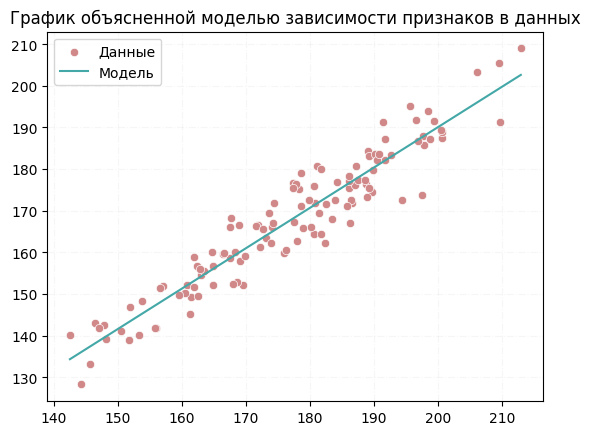

In [11]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)
r2_train = model.score(y_train, predictions)

print(
    'Значение R2 для модели на тренировочных данных: {}'.format(r2_train))

model.modelplot(X_train, y_train, predictions)

### Итого

Значение коэффициента детерминации $R^2$ модели для тренировочных данных равно `0.9022`, что является очень хорошим результатом. Однако, модель будет проверена также и на тестовой выборке, поэтому более реальное значение $R^2$ будет получено позднее.

Дополнительно изобразили подогнанную к данным модель регрессии на графике.

## Проверка значимости

In [12]:
model.model_reliability

F_table = 3.92 < F_value = 1089.44
Принимаем нулевую гипотезу.
Вычисленные параметры модели являются статистически значимыми на уровне значимости a = 0.05


### Итого

Параметры построенной модели простой линейной регрессии являются статистически значимыми при уровне значимости в 0.05

## Тестирование модели

Значение R2 для модели на тестовых данных: 0.9101889477367617


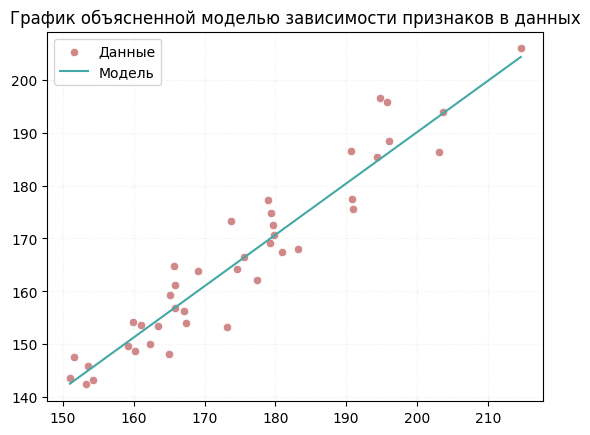

In [13]:
preds_test = model.predict(X_test)
r2_test = model.score(y_test, preds_test)

print(
    'Значение R2 для модели на тестовых данных: {}'.format(r2_test))

model.modelplot(X_test, y_test, preds_test)

### Итого

Значение $R^2$ даже выше на тестовых данных, что немного странно, но допустимо в рамках того, что тестовая выборка недостаточно велика. Модель показывает хорошие результаты, следовательно, ее параметры достоверно оценены.